# Machine Learning topological phases in real space: Nearest and second nearest-neighbours SSH model Open 6561 50.

In [1]:
#%load_ext autoreload
#%autoreload 

In [2]:
#from IPython.core.display import HTML
#HTML("<script>Jupyter.notebook.kernel.restart()</script>")

## Running models with SSH data

In [3]:
%load_ext autoreload
%autoreload 2
from simulation import *

In [4]:
### YOU MAY NEED TO CHANGE THE CSV FILENAME!!!
csv_path = "/home/rio/data/phase_transitions/csv/second_neighbours_open_6561_50.csv"   
model = RandomForestClassifier(n_estimators=25,criterion="entropy",n_jobs=-1)
########## YOU MAY NEED TO CHANGE THE ALLOWED WINDINGS!!!
allowed_windings = [-1,0,1,2]
########## YOU MAY NEED TO CHANGE THE SIMULATION DIR!
simulation_dir = "/home/rio/data/phase_transitions/simulations/second_neighbours_open_6561_50"
########## YOU MAY NEED TO CHANGE VALIDATION SPLIT!!!
val_split = 0.5  
########## YOU MAY NEED TO CHANGE WHICH FEATURES TO USE
features_to_use = None 
########## YOU MAY NEED TO SHUFFLE FEATURES
shuffle_features = False
########## YOU MAY NEED TO CHANGE THE SEED!!!!!
random_state = 123                    

dict_args = {"csv_path": csv_path, "model": model, "allowed_windings": allowed_windings, \
             "simulation_dir": simulation_dir, "val_split": val_split, \
             "features_to_use": features_to_use, "shuffle_features": shuffle_features, 
             "random_state": random_state}

#Starting an instance of Simulation with a decision tree
simulation = Simulation(**dict_args)
#

print("Info on all data: \n")
simulation.dataframe.info()
simulation.dataframe.head()

Info on all data: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 656100 entries, 0 to 656099
Columns: 108 entries, id to feat99
dtypes: float64(103), int32(3), object(2)
memory usage: 538.1+ MB


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat90,feat91,feat92,feat93,feat94,feat95,feat96,feat97,feat98,feat99
0,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,0.018648,-0.011856,...,-0.035526,-0.023898,-0.024652,0.054743,0.037192,-0.019603,-0.007444,-0.020456,-0.011856,0.018648
1,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,0.001667,0.009061,...,0.043322,-0.059866,-0.041062,0.006819,0.000272,0.032528,0.017980,-0.023590,-0.009061,-0.001667
2,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,-0.037068,0.023790,...,-0.067409,-0.045178,-0.048010,0.105150,0.073000,-0.037989,-0.014562,-0.040624,-0.023790,0.037068
3,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,0.003692,0.017921,...,-0.083711,0.113140,0.079526,-0.012099,0.000192,-0.064157,-0.035888,0.046388,0.017921,0.003692
4,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,-0.055025,0.035882,...,0.092396,0.061440,0.068817,-0.147201,-0.106074,0.054012,0.021030,0.060215,0.035882,-0.055025


#### Unque winding values

In [5]:
np.unique(simulation.dataframe.phase.values)

array([ -1,   0,   1,   2, 999], dtype=int32)

#### Checking initialization

In [6]:
n_features = simulation.n_features
n_hamiltonians = simulation.n_hamiltonians
n_ts = simulation.n_ts

print("n_features: ", n_features)
print("n_hamiltonians: ", n_hamiltonians)
print("n_ts: ", n_ts)

n_features:  100
n_hamiltonians:  6561
n_ts:  2


In [7]:
n_total = len(simulation.dataframe)
n_train = len(simulation.dataframe[simulation.dataframe.type_of == "train"])
n_val = len(simulation.dataframe[simulation.dataframe.type_of == "val"])
n_test = len(simulation.dataframe[simulation.dataframe.type_of == "test"])
n_train_hamiltonians = len(simulation.train_ids)
n_val_hamiltonians = len(simulation.val_ids)
n_test_hamiltonians = len(simulation.test_ids)
n_total_hamiltonians = n_train_hamiltonians + n_val_hamiltonians + n_test_hamiltonians

print("% train: ", n_train/n_total)
print("% val: ",  n_val/n_total)
print("% test: ", n_test/n_total)
print("% train + val + test: ", (n_train+n_val+n_test)/n_total)
print("\n")
print("number of train hamiltonians: ", n_train_hamiltonians)
print("number of val hamiltonians: ", n_val_hamiltonians)
print("number of test hamiltonians: ", n_test_hamiltonians)
print("total number of hamiltonians: ", n_total_hamiltonians)
print("\n")
print("train ids: ", simulation.train_ids)
print("val ids: ", simulation.val_ids)
print("test ids: ", simulation.test_ids)

% train:  0.8414875781130925
% val:  0.0
% test:  0.15851242188690748
% train + val + test:  1.0


number of train hamiltonians:  5521
number of val hamiltonians:  0
number of test hamiltonians:  1040
total number of hamiltonians:  6561


train ids:  [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 201, 202, 203, 204, 205, 206, 207, 

## Running a simulation

In [8]:
#running a simulation
n_experiments = 10
start_n = 0
fit_params = None
pred_params = None
######### DON'T SET THIS TO TRUE UNLESS YOUR DATASET IS SMALL!! WILL FLOOD YOUR MEMORY!!!
store_in_lists = False   
########## BELOW ARE THE PARAMETERS THAT CONTROL WHAT WILL BE SAVED
save_eigenvector=True
save_hamiltonian=True 
save_accuracy=True 
save_model=True
########## RUNNING SIMULATION
simulation.run_simulation(n_experiments = n_experiments, start_n = start_n, fit_params = fit_params, \
                          pred_params=pred_params, store_in_lists=store_in_lists, save_eigenvector=save_eigenvector, \
                          save_hamiltonian=save_hamiltonian, save_accuracy=save_accuracy, save_model=save_model)

simulation.dataframe.head(10)

running experiments: 100%|██████████| 10/10 [09:13<00:00, 55.37s/it]


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat90,feat91,feat92,feat93,feat94,feat95,feat96,feat97,feat98,feat99
0,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,2,test,0.018648,-0.011856,...,-0.035526,-0.023898,-0.024652,0.054743,0.037192,-0.019603,-0.007444,-0.020456,-0.011856,0.018648
1,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,-1,test,0.001667,0.009061,...,0.043322,-0.059866,-0.041062,0.006819,0.000272,0.032528,0.017980,-0.023590,-0.009061,-0.001667
2,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,2,test,-0.037068,0.023790,...,-0.067409,-0.045178,-0.048010,0.105150,0.073000,-0.037989,-0.014562,-0.040624,-0.023790,0.037068
3,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,-1,test,0.003692,0.017921,...,-0.083711,0.113140,0.079526,-0.012099,0.000192,-0.064157,-0.035888,0.046388,0.017921,0.003692
4,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,2,test,-0.055025,0.035882,...,0.092396,0.061440,0.068817,-0.147201,-0.106074,0.054012,0.021030,0.060215,0.035882,-0.055025
5,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,2,test,0.018648,0.011856,...,-0.035526,0.023898,-0.024652,-0.054743,0.037192,0.019603,-0.007444,0.020456,-0.011856,-0.018648
6,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,2,test,-0.001667,0.009061,...,-0.043322,-0.059866,0.041062,0.006819,-0.000272,0.032528,-0.017980,-0.023590,0.009061,-0.001667
7,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,2,test,0.055025,0.035882,...,-0.092396,0.061440,-0.068817,-0.147201,0.106074,0.054012,-0.021030,0.060215,-0.035882,-0.055025
8,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,-1,test,0.003692,-0.017921,...,-0.083711,-0.113140,0.079526,0.012099,0.000192,0.064157,-0.035888,-0.046388,0.017921,-0.003692
9,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,-1,test,0.037068,0.023790,...,0.067409,-0.045178,0.048010,0.105150,-0.073000,-0.037989,0.014562,-0.040624,0.023790,0.037068


#### Viewing a random sample

In [9]:
simulation.dataframe.sample(frac=0.1, replace=False)

,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat90,feat91,feat92,feat93,feat94,feat95,feat96,feat97,feat98,feat99
134758,1347,H_-1.2_0.55_-0.000681741.dat,-1.20,0.55,-0.000682,0,0,train,0.036983,0.117624,...,0.147993,0.102808,0.005361,0.108104,-0.047387,-0.042305,0.086920,0.119634,-0.117624,-0.036983
359600,3596,H_0.2_-0.4_1.00289.dat,0.20,-0.40,1.002892,1,1,train,0.123266,0.089847,...,0.068735,0.138938,-0.139994,-0.066750,0.106314,-0.057039,0.000298,0.134993,-0.089847,-0.123266
293531,2935,H_-0.2_-1.05_1.00421.dat,-0.20,-1.05,1.004211,1,1,val,-0.080597,0.026838,...,-0.074275,0.126114,0.181989,-0.109365,0.047025,-0.149353,-0.100280,0.109129,-0.026838,0.080597
555642,5556,H_1.4_0.4_-1.0013.dat,1.40,0.40,-1.001302,-1,-1,train,0.526277,-0.000001,...,-0.000005,0.044934,-0.000000,0.194861,0.000003,-0.107404,-0.000000,-0.375912,-0.000001,0.526277
276687,2766,H_-0.3_-1.4_1.00404.dat,-0.30,-1.40,1.004043,1,1,train,0.086132,-0.081529,...,0.108206,0.106169,-0.019797,-0.156678,0.038363,0.102353,0.018669,-0.080692,-0.081529,0.086132
436242,4362,H_0.65_1.45_2.00346.dat,0.65,1.45,2.003457,2,2,val,-0.039946,-0.012473,...,-0.002066,0.035243,-0.021481,0.062704,0.039016,-0.025546,-0.045516,-0.050152,0.012473,0.039946
186298,1862,H_-0.9_2_2.00079.dat,-0.90,2.00,2.000786,2,0,val,0.021725,-0.011878,...,-0.082164,-0.074135,-0.076192,-0.085197,-0.038707,-0.088750,-0.002307,-0.065354,0.011878,-0.021725
310783,3107,H_-0.1_-0.55_1.0053.dat,-0.10,-0.55,1.005303,1,1,val,-0.075097,-0.053655,...,-0.080994,0.011715,-0.018871,-0.079287,0.194488,0.129518,0.034999,0.146596,-0.053655,-0.075097
406763,4067,H_0.5_-1.15_1.00184.dat,0.50,-1.15,1.001841,1,1,val,-0.077588,-0.015915,...,-0.177281,0.140584,0.071197,0.084799,-0.184939,-0.033800,-0.068556,0.207772,-0.015915,-0.077588
293276,2932,H_-0.2_-1.2_1.0039.dat,-0.20,-1.20,1.003905,1,1,val,0.124859,0.097730,...,-0.159544,0.037515,0.055131,-0.159137,-0.085833,0.106984,-0.010638,-0.119658,0.097730,0.124859


#### Checking train/val/test splits again

In [10]:
n_total = len(simulation.dataframe)
n_train = len(simulation.dataframe[simulation.dataframe.type_of == "train"])
n_val = len(simulation.dataframe[simulation.dataframe.type_of == "val"])
n_test = len(simulation.dataframe[simulation.dataframe.type_of == "test"])
n_train_hamiltonians = len(simulation.train_ids)
n_val_hamiltonians = len(simulation.val_ids)
n_test_hamiltonians = len(simulation.test_ids)
n_total_hamiltonians = n_train_hamiltonians + n_val_hamiltonians + n_test_hamiltonians

print("% train: ", n_train/n_total)
print("% val: ",  n_val/n_total)
print("% test: ", n_test/n_total)
print("% train + val + test: ", (n_train+n_val+n_test)/n_total)
print("\n")
print("number of train hamiltonians: ", n_train_hamiltonians)
print("number of val hamiltonians: ", n_val_hamiltonians)
print("number of test hamiltonians: ", n_test_hamiltonians)
print("total number of hamiltonians: ", n_total_hamiltonians)
print("\n")
print("train ids: ", simulation.train_ids)
print("val ids: ", simulation.val_ids)
print("test ids: ", simulation.test_ids)

% train:  0.4208199969516842
% val:  0.42066758116140834
% test:  0.15851242188690748
% train + val + test:  1.0


number of train hamiltonians:  2761
number of val hamiltonians:  2760
number of test hamiltonians:  1040
total number of hamiltonians:  6561


train ids:  [2025, 5451, 1650, 4253, 177, 1899, 1985, 727, 6289, 2769, 4236, 6430, 1869, 2899, 275, 5259, 5378, 3856, 2995, 4012, 2607, 3790, 5191, 3880, 425, 1279, 5671, 351, 2553, 3132, 2495, 5799, 6039, 4441, 3537, 3375, 4942, 1352, 1790, 3042, 6543, 438, 6509, 3760, 3930, 73, 4477, 4969, 1497, 2476, 1127, 1951, 3043, 4951, 5924, 1612, 1745, 1619, 1090, 1857, 470, 4812, 5375, 3835, 2925, 2613, 529, 26, 5891, 4958, 4567, 4653, 1580, 6119, 1747, 3617, 1370, 466, 3961, 3524, 720, 1987, 1628, 1526, 5468, 1600, 5455, 5017, 36, 5363, 673, 5101, 3353, 2901, 2288, 558, 5288, 3691, 3538, 4174, 922, 914, 5714, 2504, 723, 4321, 4976, 4492, 1656, 4016, 2648, 5150, 3541, 68, 141, 4173, 2564, 3948, 6085, 6331, 6017, 3224, 4193, 1012, 50, 2001,

#### Checking summaries

In [11]:
ham_summary = simulation.hamiltonian_summary
ham_summary

,t1,t2,type_of,-1,0,1,2,phase,pred_phase
id,,,,,,,,,
0,-2.0,-2.00,test,0.26,0.38,0.20,0.16,999,0
1,-2.0,-1.95,test,0.29,0.31,0.21,0.19,-1,0
2,-2.0,-1.90,test,0.28,0.32,0.27,0.13,-1,0
3,-2.0,-1.85,test,0.35,0.31,0.21,0.13,-1,-1
4,-2.0,-1.80,test,0.41,0.25,0.21,0.13,-1,-1
5,-2.0,-1.75,test,0.38,0.31,0.21,0.10,-1,-1
6,-2.0,-1.70,test,0.53,0.22,0.17,0.08,-1,-1
7,-2.0,-1.65,test,0.51,0.18,0.21,0.10,-1,-1
8,-2.0,-1.60,test,0.51,0.22,0.19,0.08,-1,-1


In [12]:
len(ham_summary)

6561

In [13]:
eigen_summary = simulation.eigenvector_summary
eigen_summary

,id,phase,pred_phase,type_of
0,0,999,2,test
1,0,999,-1,test
2,0,999,2,test
3,0,999,-1,test
4,0,999,2,test
5,0,999,2,test
6,0,999,2,test
7,0,999,2,test
8,0,999,-1,test
9,0,999,-1,test


In [14]:
len(eigen_summary)

656100

In [15]:
simulation.accuracy

{'eigenvector_train': 0.9999420499818906,
 'eigenvector_val': 0.9760543478260869,
 'eigenvector_test': 0.700314318975553,
 'hamiltonian_train': 1.0,
 'hamiltonian_val': 0.9978260869565218,
 'hamiltonian_test': 0.9033760186263097}

In [16]:
ham_summary_list = simulation.hamiltonian_summary_list
ham_summary_list

[]

In [17]:
eigen_summary_list = simulation.eigenvector_summary_list
eigen_summary_list

[]

In [18]:
accuracy_list = simulation.accuracy_list
accuracy_list

{'eigenvector_train': [],
 'eigenvector_val': [],
 'eigenvector_test': [],
 'hamiltonian_train': [],
 'hamiltonian_val': [],
 'hamiltonian_test': []}

#### Visualizing train/val/test splits

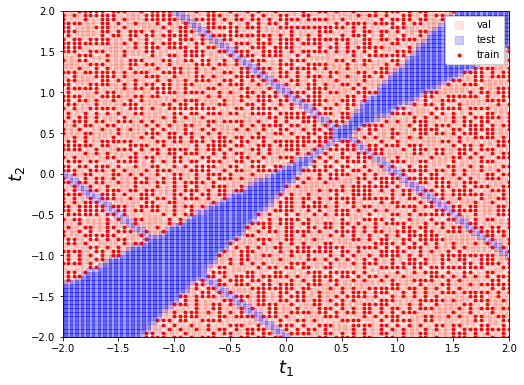

In [19]:
fig_params={"figsize": (8,6)} 
val_params={"marker": "s", "s": 64, "alpha": 0.2, "color": "salmon", "label": "val"}
test_params={"marker": "s", "s": 64, "alpha": 0.2, "color": "blue", "label": "test"}
train_params={"marker": "o", "s": 8, "color": "red", "label": "train"}
legend_params={"framealpha": 1}
xlabel_params={"xlabel": "$t_1$", "fontsize": 18}
ylabel_params={"ylabel": "$t_2$", "fontsize": 18}
title_params={}
savefig_params = {}
simulation.visualize_scatter_2d(fig_params = fig_params, val_params = val_params, test_params = test_params,\
                                train_params = train_params, legend_params = legend_params, \
                                xlabel_params = xlabel_params, ylabel_params = ylabel_params, title_params = title_params,\
                               savefig_params = savefig_params)

# Analyzing simulation data

In [20]:
%load_ext autoreload
%autoreload 2
from data_analysis import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Testing Experiment class

In [21]:
#simulation_dir = "./simulation/fig1b-6561-100"
simulation_dir = "/home/rio/data/phase_transitions/simulations/second_neighbours_open_6561_50"
experiment_name = "0"
experiment = Experiment(simulation_dir, experiment_name)

#### Viewing Train/Val/Test split

In [22]:
experiment.print_train_val_test()

% train:  0.4208199969516842
% val:  0.42066758116140834
% test:  0.15851242188690748
% train + val + test:  1.0


number of train hamiltonians:  2761
number of val hamiltonians:  2760
number of test hamiltonians:  1040
total number of hamiltonians:  6561


#### Viewing dataset summary

In [23]:
experiment.print_phases()

Summary of train + val data

% train/val phases: 
 0    0.325122
 1    0.322586
-1    0.178953
 2    0.173338
Name: phase, dtype: float64


total train/val phases: 
 0    1795
 1    1781
-1     988
 2     957
Name: phase, dtype: int64


Summary of test data

% test phases: 
 2    0.399302
-1    0.363213
 1    0.126892
 0    0.110594
Name: phase, dtype: float64


total test phases: 
 2    343
-1    312
 1    109
 0     95
Name: phase, dtype: int64


Summary of train + val + test data

% phases: 
 1    0.296238
 0    0.296238
-1    0.203762
 2    0.203762
Name: phase, dtype: float64


total phases: 
 1    1890
 0    1890
-1    1300
 2    1300
Name: phase, dtype: int64


#### Viewing eigenvector summary

In [24]:
experiment.eigenvector_summary.head()

,id,phase,pred_phase,type_of
0,0,999,2,test
1,0,999,2,test
2,0,999,2,test
3,0,999,2,test
4,0,999,-1,test


#### Viewing Hamiltonian summary

In [25]:
experiment.hamiltonian_summary.head()

,t1,t2,type_of,-1,0,1,2,phase,pred_phase
id,,,,,,,,,
0,-2.0,-2.00,test,0.20,0.41,0.28,0.11,999,0
1,-2.0,-1.95,test,0.27,0.35,0.26,0.12,-1,0
2,-2.0,-1.90,test,0.23,0.38,0.28,0.11,-1,0
3,-2.0,-1.85,test,0.30,0.38,0.25,0.07,-1,0
4,-2.0,-1.80,test,0.37,0.36,0.20,0.07,-1,-1


#### Viewing accuracy

In [26]:
experiment.accuracy

{'eigenvector_train': 0.9999456718580224,
 'eigenvector_val': 0.9719782608695652,
 'eigenvector_test': 0.6845052386495926,
 'hamiltonian_train': 1.0,
 'hamiltonian_val': 0.9963768115942029,
 'hamiltonian_test': 0.8719441210710128}

#### Visualizing train/val/test splits with scatter plot

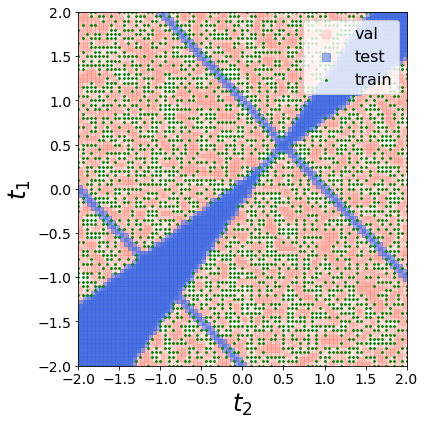

In [27]:
#fig_params={"figsize": (8,6)} 
fig_params = fig_params={"figsize": (6,6)} 
#val_params={"marker": "s", "s": 64, "alpha": 0.2, "color": "salmon", "label": "val"}
#test_params={"marker": "s", "s": 64, "alpha": 0.2, "color": "blue", "label": "test"}
#train_params={"marker": "o", "s": 10, "color": "red", "label": "train"}
val_params={"marker": "s", "s": 64, "alpha": 0.2, "color": "salmon", "label": "val"}
test_params={"marker": "s", "s": 64, "alpha": 0.5, "color": "royalblue", "label": "test"}
train_params={"marker": "o", "s": 3, "alpha": 1, "color": "green", "label": "train"}
legend_params={"framealpha": 0.8, "loc": "upper right", "fontsize": 16}
xlabel_params={"xlabel": "$t_2$", "fontsize": 24}
ylabel_params={"ylabel": "$t_1$", "fontsize": 24}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 14}
yticks_params = {"fontsize": 14}
tight_params = {}
#savefig_params = {"fname": os.path.join(experiment.simulation_dir, "fig1a-6561_train_val_test_0.png")}
path_to_save = "/home/rio/1901.01963/second_neighbours_open_6561_50_train_val_test_split_experiment_0.png"
savefig_params = {"fname": path_to_save}
experiment.scatter_train_val_test(val_params, test_params, train_params, legend_params, fig_params, xlabel_params, \
                               ylabel_params, title_params, xlim_params, ylim_params, xticks_params, yticks_params,\
                                 tight_params, savefig_params)

#### Plotting train winding labels with scatter plot

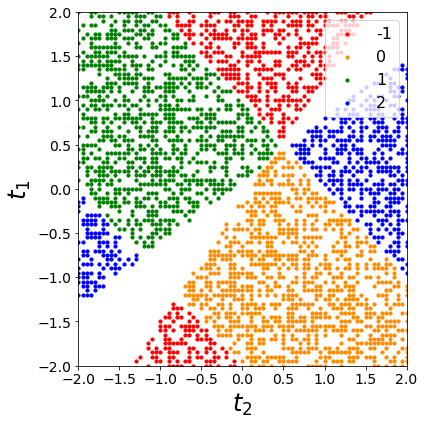

In [28]:
#fig_params={"figsize": (8,6)} 
fig_params = fig_params={"figsize": (6,6)} 
winding_params = {-1: {"marker": "o", "s": 10, "color": "red", "label": -1}, 
                  0: {"marker": "o", "s": 10, "color": "darkorange", "label": 0}, \
                  1: {"marker": "o", "s": 10, "color": "green", "label": 1}, \
                  2: {"marker": "o", "s": 10, "color": "blue", "label": 2}}
legend_params={"framealpha": 0.8, "loc": "upper right", "fontsize": 16}
xlabel_params={"xlabel": "$t_2$", "fontsize": 24}
ylabel_params={"ylabel": "$t_1$", "fontsize": 24}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 14}
yticks_params = {"fontsize": 14}
tight_params = {}
path_to_save = "/home/rio/1901.01963/second_neighbours_open_6561_50_train_winding_labels_experiment_0.png"
savefig_params = {"fname": path_to_save}
experiment.scatter_winding_train(winding_params, legend_params, fig_params, xlabel_params, ylabel_params, \
                                 title_params,  xlim_params, ylim_params, xticks_params, yticks_params, \
                                 tight_params, savefig_params)

#### Plotting prediction grid with pcolormesh

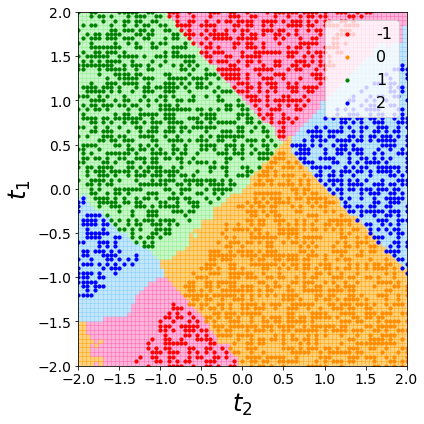

In [29]:
#fig_params, winding_params, contourf_params, legend_params, xlabel_params, ylabel_params, title_params, savefig_params)
#fig_params={"figsize": (8,6)} 
fig_params = fig_params={"figsize": (6,6)}
#winding_params = {0: {"marker": "o", "s": 10, "color": "darkorange", "label": 0}, -1: {"marker": "o", "s": 10, "color": "red", "label": -1}, \
#                  2: {"marker": "o", "s": 10, "color": "blue", "label": 2}, \
#                  1: {"marker": "o", "s": 10, "color": "green", "label": 1}}
winding_params = {-1: {"marker": "o", "s": 10, "color": "red", "label": -1}, 
                  0: {"marker": "o", "s": 10, "color": "darkorange", "label": 0}, \
                  1: {"marker": "o", "s": 10, "color": "green", "label": 1}, \
                  2: {"marker": "o", "s": 10, "color": "blue", "label": 2}}
pcolormesh_params = {"cmap": ListedColormap(["hotpink", "orange", "lightgreen","lightskyblue"]), "alpha": 0.5}
legend_params={"framealpha": 0.8, "loc": "upper right", "fontsize": 16}
xlabel_params={"xlabel": "$t_2$", "fontsize": 24}
ylabel_params={"ylabel": "$t_1$", "fontsize": 24}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 14}
yticks_params = {"fontsize": 14}
tight_params = {}
path_to_save = "/home/rio/1901.01963/second_neighbours_open_6561_50_prediction_grid_experiment_0.png"
savefig_params = {"fname": os.path.join(experiment.simulation_dir, path_to_save)}
experiment.pcolormesh_prediction_grid(winding_params, pcolormesh_params, legend_params, fig_params, xlabel_params, \
                                ylabel_params, title_params, xlim_params, ylim_params, xticks_params, yticks_params, \
                                      tight_params,  savefig_params)




#### Plotting Winding Heatmaps (winding -1 = red)

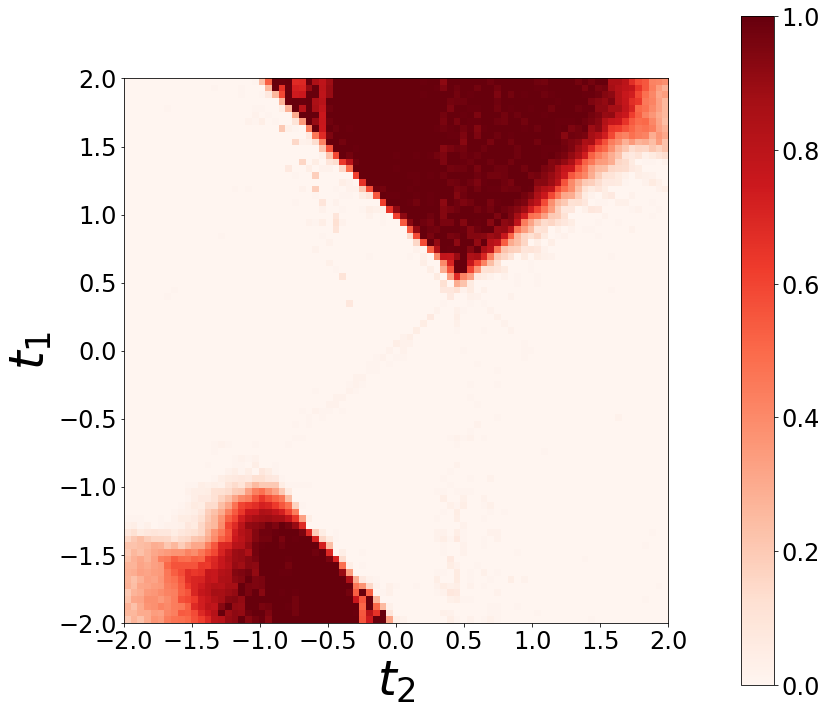

In [30]:
winding = -1
imshow_params = {"cmap": "Reds", "aspect": "equal", "alpha": 1, "origin": "lower", "extent": [-2,2,-2,2], "vmin": 0, "vmax": 1}
colorbar_params=colorbar_params={"mappable": None, "ticks": np.linspace(0,1,6), "orientation": "vertical", \
                                 "pad": 0.1, "shrink": 0.8, "labelsize": 24}
##########
fig_params = fig_params={"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
tight_params={}
#path_to_save = "/home/rio/1901.01963/fig1b-6561-100-winding_grid_2.png"
#savefig_params = {"fname": path_to_save}
savefig_params = {}
experiment.imshow_winding_grid(winding, imshow_params, colorbar_params, fig_params, xlabel_params, \
                               ylabel_params, title_params, xlim_params, ylim_params, xticks_params, yticks_params, \
                               tight_params, savefig_params)


#### Plotting Winding Heatmaps (winding 0 = orange)

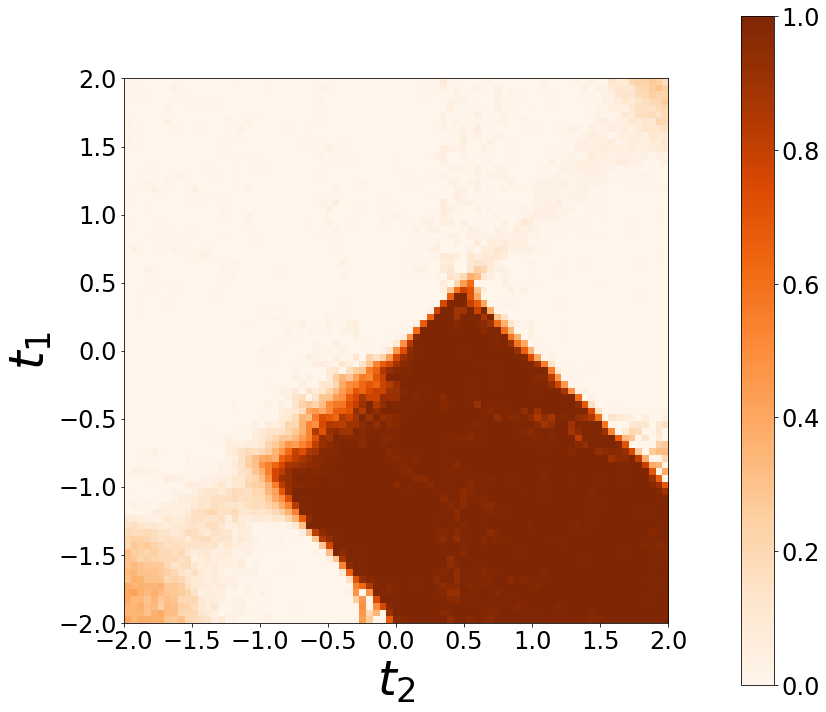

In [31]:
winding = 0
imshow_params = {"cmap": "Oranges", "aspect": "equal", "alpha": 1, "origin": "lower", "extent": [-2,2,-2,2], "vmin": 0, "vmax": 1}
colorbar_params=colorbar_params={"mappable": None, "ticks": np.linspace(0,1,6), "orientation": "vertical", \
                                 "pad": 0.1, "shrink": 0.8, "labelsize": 24}
##########
fig_params = fig_params={"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
tight_params={}
#path_to_save = "/home/rio/1901.01963/fig1b-6561-100-winding_grid_2.png"
#savefig_params = {"fname": path_to_save}
savefig_params = {}
experiment.imshow_winding_grid(winding, imshow_params, colorbar_params, fig_params, xlabel_params, \
                               ylabel_params, title_params, xlim_params, ylim_params, xticks_params, yticks_params, \
                               tight_params, savefig_params)


#### Plotting Winding Heatmaps (winding 1 = green)

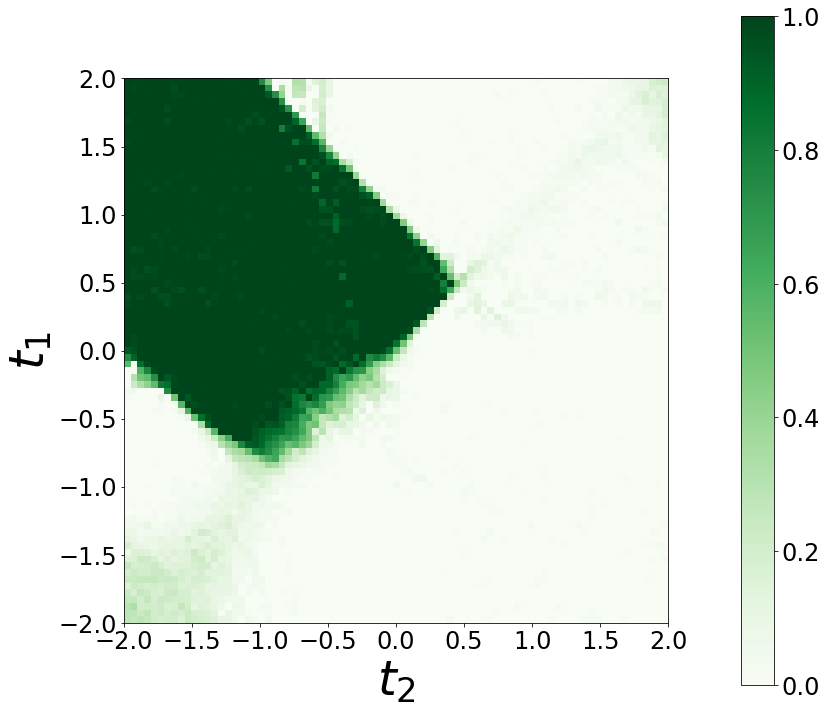

In [32]:
winding = 1
imshow_params = {"cmap": "Greens", "aspect": "equal", "alpha": 1, "origin": "lower", "extent": [-2,2,-2,2], "vmin": 0, "vmax": 1}
colorbar_params=colorbar_params={"mappable": None, "ticks": np.linspace(0,1,6), "orientation": "vertical", \
                                 "pad": 0.1, "shrink": 0.8, "labelsize": 24}
##########
fig_params = fig_params={"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
tight_params={}
#path_to_save = "/home/rio/1901.01963/fig1b-6561-100-winding_grid_2.png"
#savefig_params = {"fname": path_to_save}
savefig_params = {}
experiment.imshow_winding_grid(winding, imshow_params, colorbar_params, fig_params, xlabel_params, \
                               ylabel_params, title_params, xlim_params, ylim_params, xticks_params, yticks_params, \
                               tight_params, savefig_params)

#### Plotting Winding Heatmaps (winding 2 = blue)

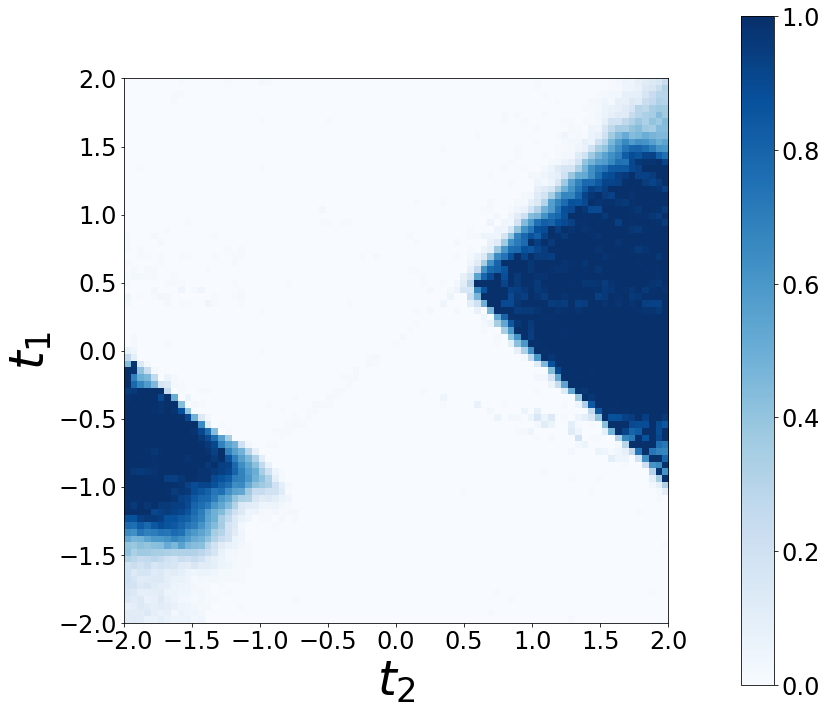

In [33]:
winding = 2
imshow_params = {"cmap": "Blues", "aspect": "equal", "alpha": 1, "origin": "lower", "extent": [-2,2,-2,2], "vmin": 0, "vmax": 1}
colorbar_params=colorbar_params={"mappable": None, "ticks": np.linspace(0,1,6), "orientation": "vertical", \
                                 "pad": 0.1, "shrink": 0.8, "labelsize": 24}
##########
fig_params = fig_params={"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
tight_params={}
#path_to_save = "/home/rio/1901.01963/fig1b-6561-100-winding_grid_2.png"
#savefig_params = {"fname": path_to_save}
savefig_params = {}
experiment.imshow_winding_grid(winding, imshow_params, colorbar_params, fig_params, xlabel_params, \
                               ylabel_params, title_params, xlim_params, ylim_params, xticks_params, yticks_params, \
                               tight_params, savefig_params)

#### Plotting merged heatmaps

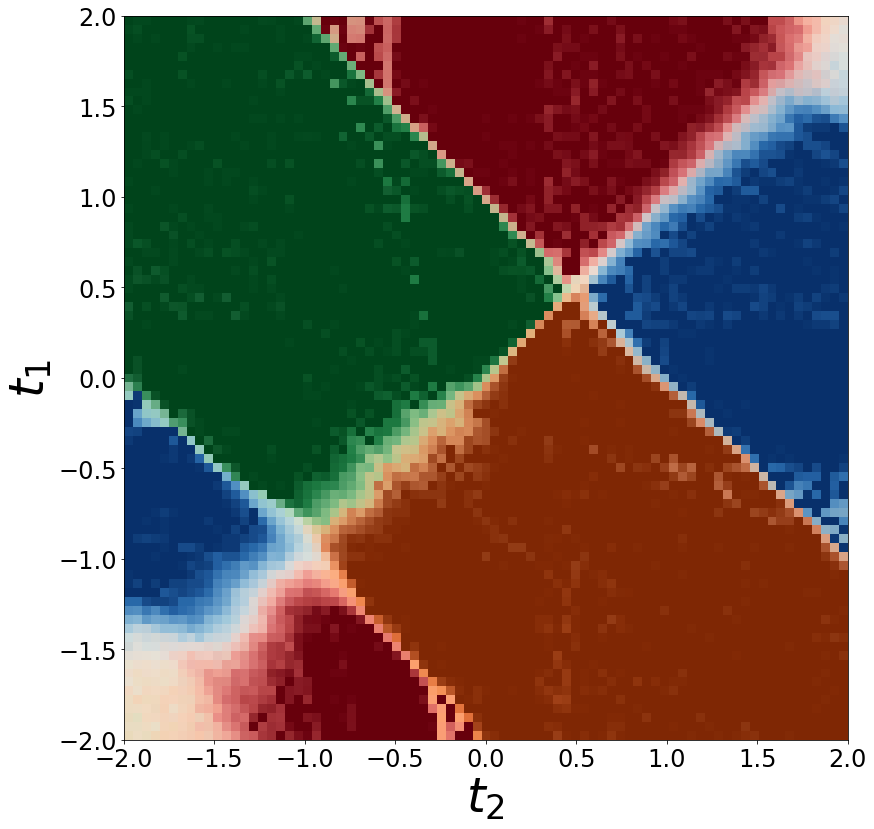

In [34]:
winding_params = {-1: {"cmap": "Reds_alpha", "aspect": "equal", "alpha": 1, "origin": "lower", "extent": [-2,2,-2,2], \
                  "vmin": 0, "vmax": 1},
                 0: {"cmap": "Oranges_alpha", "aspect": "equal", "alpha": 1, "origin": "lower", "extent": [-2,2,-2,2], \
                     "vmin": 0, "vmax": 1},
                 1: {"cmap": "Greens_alpha", "aspect": "equal", "alpha": 1, "origin": "lower", "extent": [-2,2,-2,2], \
                     "vmin": 0, "vmax": 1},
                 2: {"cmap": "Blues_alpha", "aspect": "equal", "alpha": 1, "origin": "lower", "extent": [-2,2,-2,2],\
                  "vmin": 0, "vmax": 1}}
colorbar_params={}
##########
fig_params = fig_params={"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
tight_params={}
#path_to_save = "/home/linneu/Dropbox/Machine/paper_linneu/fig1b-6561-100-merged_winding_grid_0.png"
#savefig_params = {"fname": path_to_save}
savefig_params = {}
experiment.merge_imshow_winding_grids(winding_params, colorbar_params, fig_params, xlabel_params, ylabel_params, \
                                      title_params, xlim_params, ylim_params, xticks_params, yticks_params,  \
                                      tight_params, savefig_params)

## Testing ExperimentEnsemble Class

In [35]:
%load_ext autoreload
%autoreload 2
from simulation import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
simulation_dir = "/home/rio/data/phase_transitions/simulations/second_neighbours_open_6561_50"
n_experiments = None
load_hamiltonian_summary = False
simulation = ExperimentEnsemble(simulation_dir, n_experiments, load_hamiltonian_summary)

#### Computing Hamiltonian summary

In [37]:
simulation.compute_hamiltonian_summary()

majority vote: 100%|██████████| 6561/6561 [00:00<00:00, 125292.89it/s]


In [38]:
simulation.hamiltonian_summary

,t1,t2,type_of,-1,0,1,2,phase,pred_phase
id,,,,,,,,,
0,-2.0,-2.00,test,0.3043,0.3563,0.2254,0.1140,999,0
1,-2.0,-1.95,test,0.3177,0.3004,0.2624,0.1195,-1,-1
2,-2.0,-1.90,test,0.3384,0.2844,0.2693,0.1079,-1,-1
3,-2.0,-1.85,test,0.3746,0.2799,0.2551,0.0904,-1,-1
4,-2.0,-1.80,test,0.4349,0.2691,0.2151,0.0809,-1,-1
5,-2.0,-1.75,test,0.4800,0.2535,0.2016,0.0649,-1,-1
6,-2.0,-1.70,test,0.5267,0.2296,0.1797,0.0640,-1,-1
7,-2.0,-1.65,test,0.5424,0.2157,0.1759,0.0660,-1,-1
8,-2.0,-1.60,test,0.5757,0.2097,0.1774,0.0372,-1,-1


#### Plotting Simulation Winding Heatmaps (winding -1 = red)

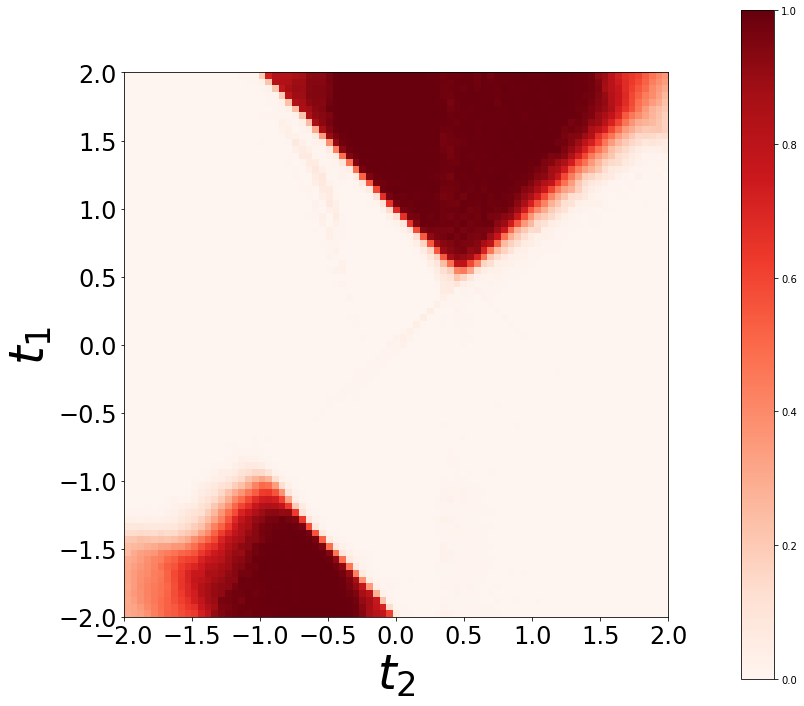

In [39]:
winding =-1
imshow_params = {"cmap": "Reds", "aspect": "equal", "alpha": 1, "origin": "lower", "extent": [-2,2,-2,2], "vmin": 0, "vmax": 1}
colorbar_params=colorbar_params={"mappable": None, "ticks": np.linspace(0,1,6), "orientation": "vertical", \
                                 "pad": 0.1, "shrink": 0.8}
##########
fig_params = fig_params={"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
path_to_save = "/home/rio/1901.01963/second_neighbours_open_6561_50_simulation_winding_-1_grid.png"
savefig_params = {"fname": path_to_save}
tight_params = {}
#experiment.imshow_winding_grid(winding, imshow_params, colorbar_params, fig_params, xlabel_params, \
#                               ylabel_params, title_params, savefig_params)
simulation.imshow_winding_grid(winding, imshow_params, colorbar_params, fig_params, xlabel_params, \
                               ylabel_params, title_params, xlim_params, ylim_params, xticks_params, yticks_params, \
                               tight_params, savefig_params)


#### Plotting Simulation Winding Heatmaps (winding 0 = orange)

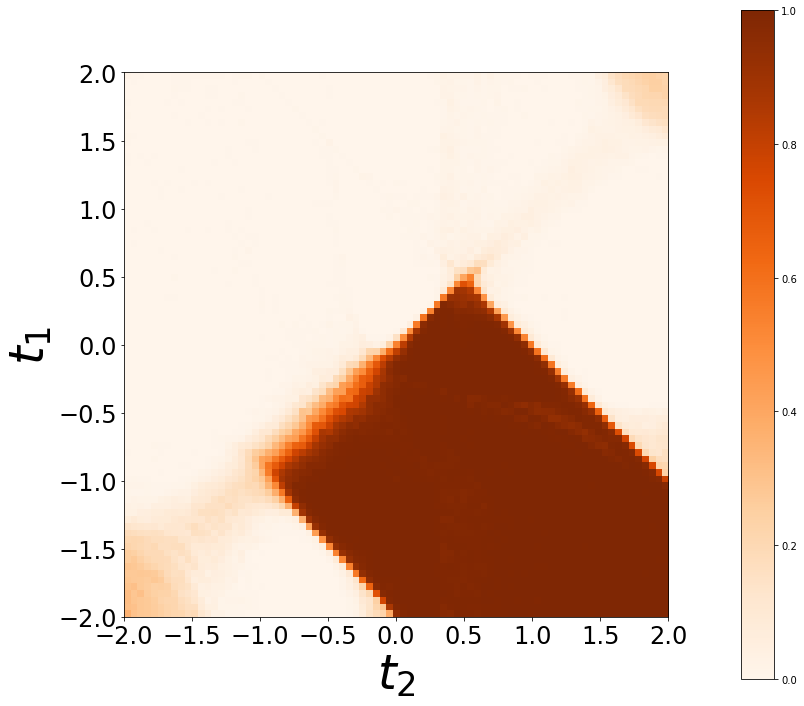

In [40]:
winding =0
imshow_params = {"cmap": "Oranges", "aspect": "equal", "alpha": 1, "origin": "lower", "extent": [-2,2,-2,2], "vmin": 0, "vmax": 1}
colorbar_params=colorbar_params={"mappable": None, "ticks": np.linspace(0,1,6), "orientation": "vertical", \
                                 "pad": 0.1, "shrink": 0.8}
##########
fig_params = fig_params={"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
path_to_save = "/home/rio/1901.01963/second_neighbours_open_6561_50_simulation_winding_0_grid.png"
savefig_params = {"fname": path_to_save}
tight_params = {}
#experiment.imshow_winding_grid(winding, imshow_params, colorbar_params, fig_params, xlabel_params, \
#                               ylabel_params, title_params, savefig_params)
simulation.imshow_winding_grid(winding, imshow_params, colorbar_params, fig_params, xlabel_params, \
                               ylabel_params, title_params, xlim_params, ylim_params, xticks_params, yticks_params, \
                               tight_params, savefig_params)


#### Plotting Simulation Winding Heatmaps (winding 1 = green)

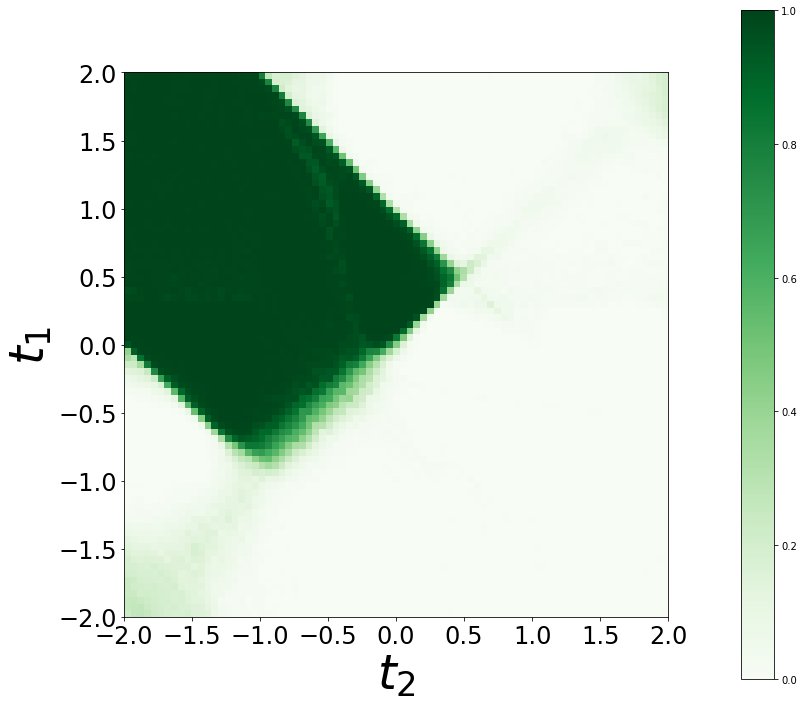

In [41]:
winding =1
imshow_params = {"cmap": "Greens", "aspect": "equal", "alpha": 1, "origin": "lower", "extent": [-2,2,-2,2], "vmin": 0, "vmax": 1}
colorbar_params=colorbar_params={"mappable": None, "ticks": np.linspace(0,1,6), "orientation": "vertical", \
                                 "pad": 0.1, "shrink": 0.8}
##########
fig_params = fig_params={"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
path_to_save = "/home/rio/1901.01963/second_neighbours_open_6561_50_simulation_winding_1_grid.png"
savefig_params = {"fname": path_to_save}
tight_params = {}
#experiment.imshow_winding_grid(winding, imshow_params, colorbar_params, fig_params, xlabel_params, \
#                               ylabel_params, title_params, savefig_params)
simulation.imshow_winding_grid(winding, imshow_params, colorbar_params, fig_params, xlabel_params, \
                               ylabel_params, title_params, xlim_params, ylim_params, xticks_params, yticks_params, \
                               tight_params, savefig_params)


#### Plotting Simulation Winding Heatmaps (winding 2 = blue)

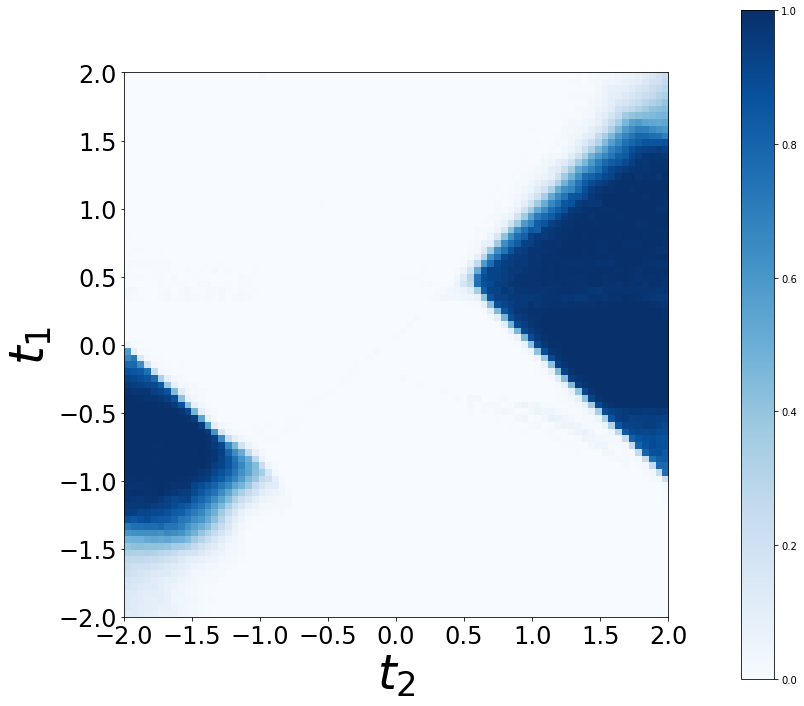

In [42]:
winding =2
imshow_params = {"cmap": "Blues", "aspect": "equal", "alpha": 1, "origin": "lower", "extent": [-2,2,-2,2], "vmin": 0, "vmax": 1}
colorbar_params=colorbar_params={"mappable": None, "ticks": np.linspace(0,1,6), "orientation": "vertical", \
                                 "pad": 0.1, "shrink": 0.8}
##########
fig_params = fig_params={"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
path_to_save = "/home/rio/1901.01963/second_neighbours_open_6561_50_simulation_winding_2_grid.png"
savefig_params = {"fname": path_to_save}
tight_params = {}
#experiment.imshow_winding_grid(winding, imshow_params, colorbar_params, fig_params, xlabel_params, \
#                               ylabel_params, title_params, savefig_params)
simulation.imshow_winding_grid(winding, imshow_params, colorbar_params, fig_params, xlabel_params, \
                               ylabel_params, title_params, xlim_params, ylim_params, xticks_params, yticks_params, \
                               tight_params, savefig_params)


#### Plotting Merged Simulation Winding Heatmaps

Plotting winding -1
Plotting winding 0
Plotting winding 1
Plotting winding 2


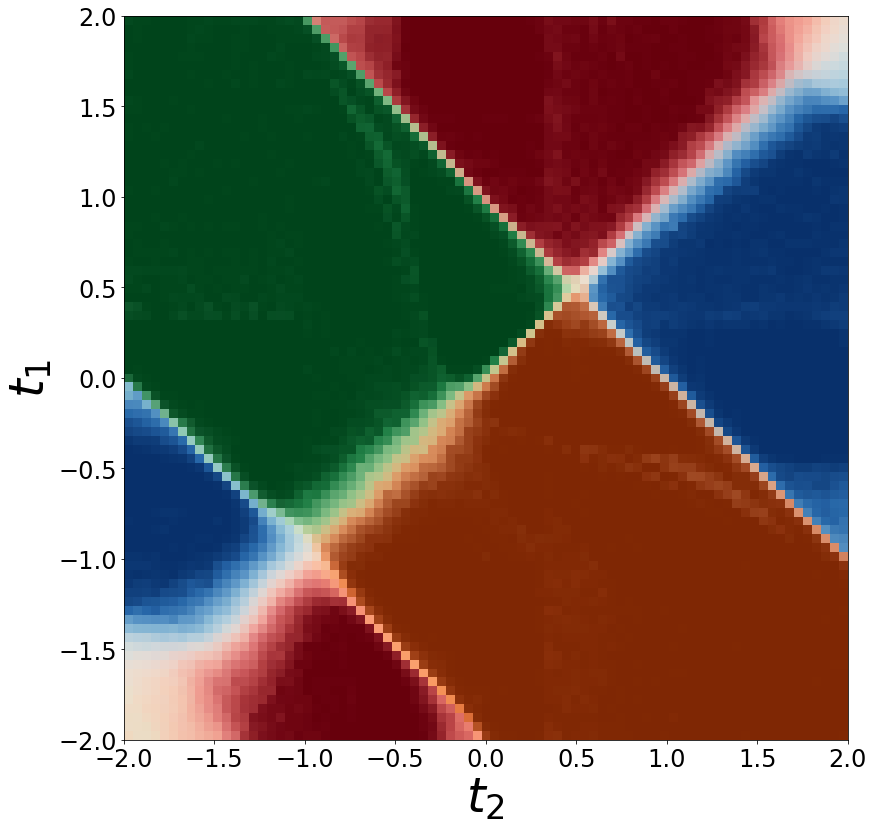

In [43]:
winding_params = {-1: {"cmap": "Reds_alpha", "aspect": "equal", "alpha": 1, "origin": "lower", "extent": [-2,2,-2,2], \
                  "vmin": 0, "vmax": 1},
                 0: {"cmap": "Oranges_alpha", "aspect": "equal", "alpha": 1, "origin": "lower", "extent": [-2,2,-2,2], \
                     "vmin": 0, "vmax": 1},
                 1: {"cmap": "Greens_alpha", "aspect": "equal", "alpha": 1, "origin": "lower", "extent": [-2,2,-2,2], \
                     "vmin": 0, "vmax": 1},
                 2: {"cmap": "Blues_alpha", "aspect": "equal", "alpha": 1, "origin": "lower", "extent": [-2,2,-2,2],\
                  "vmin": 0, "vmax": 1}}
#colorbar_params={"mappable": None}
colorbar_params={}
##########
fig_params = {"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
tight_params={}
path_to_save = "/home/rio/1901.01963/second_neighbours_open_6561_50_simulation_merged_winding_grid.png"
savefig_params = {"fname": path_to_save}
simulation.merge_imshow_winding_grids(winding_params, colorbar_params, fig_params, xlabel_params, ylabel_params, \
                                      title_params, xlim_params, ylim_params, xticks_params, yticks_params,  \
                                      tight_params, savefig_params)

#### Computing mean accuracies

In [44]:
save_to_disk = False
simulation.compute_mean_accuracy(save_to_disk=save_to_disk)
simulation.mean_accuracy

computing mean accuracies: 100%|██████████| 100/100 [01:17<00:00,  1.06it/s]


{'eigenvector_train': 0.9999396233248824,
 'eigenvector_val': 0.9743672826086954,
 'eigenvector_test': 0.7057616996507566,
 'hamiltonian_train': 1.0,
 'hamiltonian_val': 0.9974275362318837,
 'hamiltonian_test': 0.900838183934808}

#### Computing bootstrap accuracies

In [45]:
save_to_disk = False
simulation.compute_bootstrap_accuracy(save_to_disk=save_to_disk)
simulation.bootstrap_accuracy

{'hamiltonian_train': 1.0,
 'hamiltonian_val': 1.0,
 'hamiltonian_test': 0.9033760186263097}

#### Computing mean feature importances

In [46]:
import operator
save_to_disk = False
simulation.compute_mean_feature_importance(save_to_disk=save_to_disk)
### Sorted feature importances from highest to lowest
sorted_feature_importances = sorted(simulation.feature_importance.items(), key=operator.itemgetter(1),reverse=True)
print("Sorted feature importances: ", sorted_feature_importances)

mean feature importances: 100%|██████████| 100/100 [00:15<00:00,  7.41it/s]

Sorted feature importances:  [(1, 0.034081203037621), (98, 0.03392870211214478), (3, 0.026226613361191187), (96, 0.02578961811328168), (0, 0.022885256412415365), (99, 0.022304433406639193), (5, 0.01876451950580552), (94, 0.018299169084659176), (48, 0.01821985603782633), (51, 0.018123587378324122), (2, 0.01780740423889759), (97, 0.017725005923998373), (49, 0.014582317531751548), (50, 0.01445704752097769), (7, 0.014303040125491355), (92, 0.013971761224577878), (4, 0.013962257644688504), (95, 0.01375852957580444), (53, 0.011995145444612616), (6, 0.011927420359920657), (46, 0.011902873915000316), (93, 0.011716111578688203), (9, 0.011659592633399093), (90, 0.011432614639329777), (47, 0.011150144880725459), (52, 0.011001088767035356), (55, 0.010541040106816855), (44, 0.01043924224548981), (11, 0.01010105091073265), (88, 0.009940338080035553), (8, 0.009794035065763877), (91, 0.009724125828353658), (45, 0.009281392471170501), (54, 0.009260288802099533), (13, 0.008845755729079027), (86, 0.00877

In [47]:
%load_ext autoreload
%autoreload 2
from simulation import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Plotting feature importances

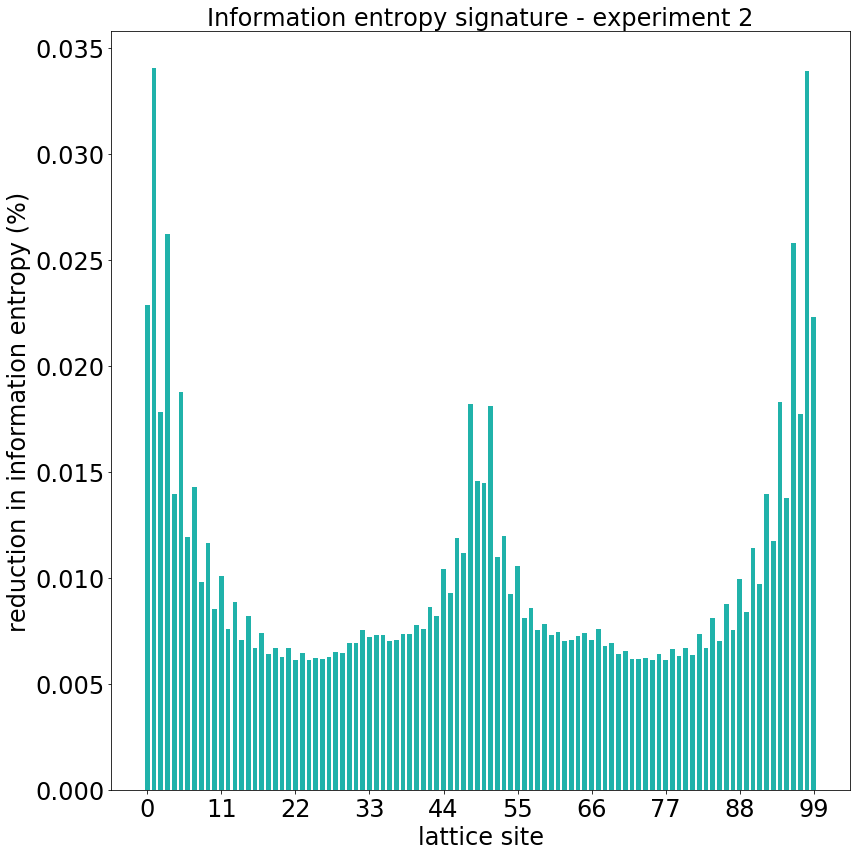

In [48]:
#plot_feature_importances(self, n_features=None, fig_params={}, xlabel_params={}, ylabel_params={}, title_params={})
n_features = None
plot_type = "bar"
plot_params = {"color": "lightseagreen", "width": 0.7}
#plot_params=None
#hist_params = {"color": "tomato", "width": 0.7}
#hist_params = None
hist_precision = 1000
fig_params={"figsize": (12,12)} 
xlabel_params = {"xlabel": "lattice site", "fontsize": 24}
ylabel_params = {"ylabel": "reduction in information entropy (%)", "fontsize": 24}
title_params = {"label": "Information entropy signature - experiment 2", "fontsize": 24}
#title_params = {"label": "Lattice site importances", "fontsize": 20}
#xlim_params = {"left": 0, "right": len(simulation.feature_importance)}
#ylim_params = {"bottom": 0, "top": 0.2}
#xlim_params = {"left": 0, "right": 99}
xlim_params = {}
ylim_params = {}
xticks_params = {"ticks": np.linspace(0,99,10).astype(int), "fontsize": 24}
#xticks_params = {}
yticks_params = {"fontsize": 24}
tight_params = {}
path_to_save = "/home/rio/1901.01963/second_neighbours_open_6561_50_feature_importances.png"
savefig_params = {"fname": path_to_save}
simulation.plot_feature_importances(n_features, plot_type,  hist_precision, plot_params, fig_params,\
                                    xlabel_params, ylabel_params, title_params, xlim_params, \
                                    ylim_params, xticks_params, yticks_params, tight_params, savefig_params)

#### Plotting cumulative feature importances

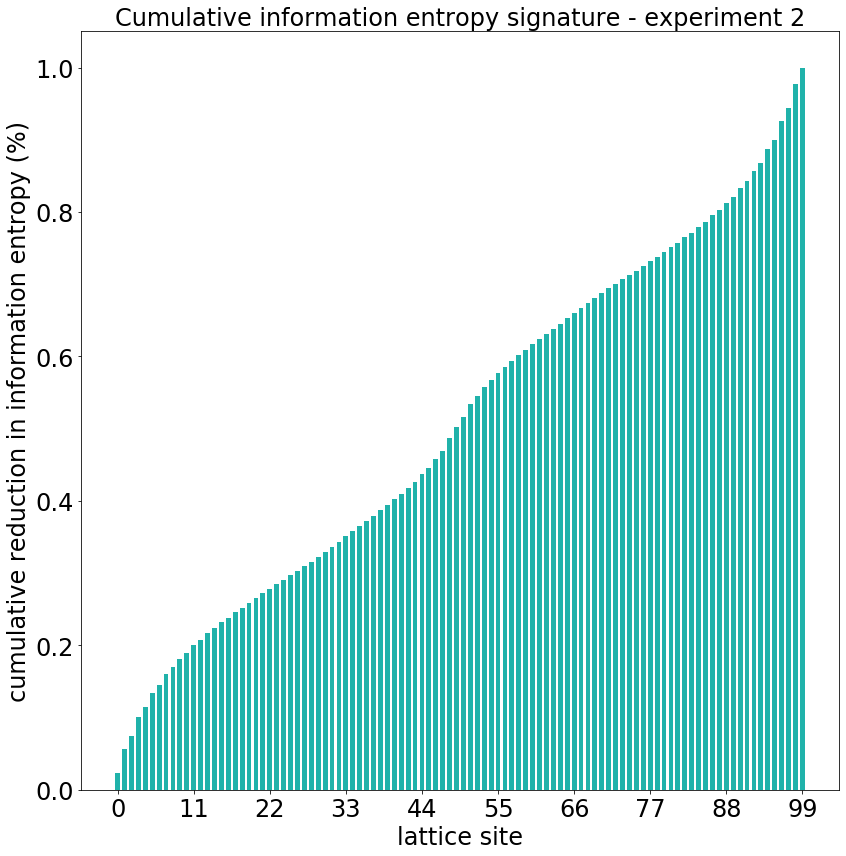

In [50]:
n_features = None
plot_type = "bar"
hist_precision = 1000
plot_params = {"color":"lightseagreen", "width": 0.7}
fig_params={"figsize": (12,12)}
xlabel_params = {"xlabel": "lattice site", "fontsize": 24}
ylabel_params = {"ylabel": "cumulative reduction in information entropy (%)", "fontsize": 24}
title_params = {"label": "Cumulative information entropy signature - experiment 2", "fontsize": 24}
#title_params = {"label": "Lattice site importances", "fontsize": 20}
#xlim_params = {"left": 0, "right": len(simulation.feature_importance)}
#ylim_params = {"bottom": 0, "top": 0.2}
#xlim_params = {"left": 0, "right": 99}
#xlim_params = {"left":-1, "right":100}
xlim_params = {}
ylim_params = {}
#xticks_params = {"ticks": np.array(list(simulation.cumulative_feature_importance.keys()))[np.linspace(0,99,16).astype(int)] }
xticks_params = {"ticks": np.linspace(0,99,10).astype(int), "fontsize": 24}
yticks_params = {"fontsize": 24}
path_to_save = "/home/rio/1901.01963/second_neighbours_open_6561_50_cumulative_feature_importances.png"
savefig_params = {"fname": path_to_save}
simulation.plot_cumulative_feature_importances(n_features, plot_type,  hist_precision, plot_params, fig_params,\
                                    xlabel_params, ylabel_params, title_params, xlim_params, \
                                    ylim_params, xticks_params, yticks_params, tight_params, savefig_params)
